In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

predictions = pd.read_csv('../data/roc_data/summit_1_12_24_ml_predictions.csv', header=0, delimiter='\t')

predictions['classifier_id'] = predictions.classifier.map({
    'GradientBoosting': 0, 
    'RandomForest': 1, 
    'GaussianNB': 2, 
    'DecisionTree': 3, 
    'LogisticRegression': 4, 
    'MLP': 5, 
    'AdaBoost': 6, 
    'KNN': 7}).astype(int)

predictions['sampler_id'] = predictions.sampler.map({
    'RandomOverSampler': 0, 
    'SMOTE': 1, 
    'DummySampler': 2, 
    'SMOTEENN': 3, 
    'SMOTETomek': 4, 
    'ADASYN': 5}).astype(int)

predictions.drop('classifier', inplace=True, axis=1)
predictions.drop('sampler', inplace=True, axis=1)
predictions.drop('training_systems',inplace=True, axis=1)
predictions.drop('testing_systems',inplace=True, axis=1)
print(predictions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 7 columns):
training_numprocs    1737 non-null int64
testing_numprocs     1737 non-null int64
split                1737 non-null object
roc-auc              1737 non-null float64
time                 1296 non-null float64
classifier_id        1737 non-null int32
sampler_id           1737 non-null int32
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 81.5+ KB
None


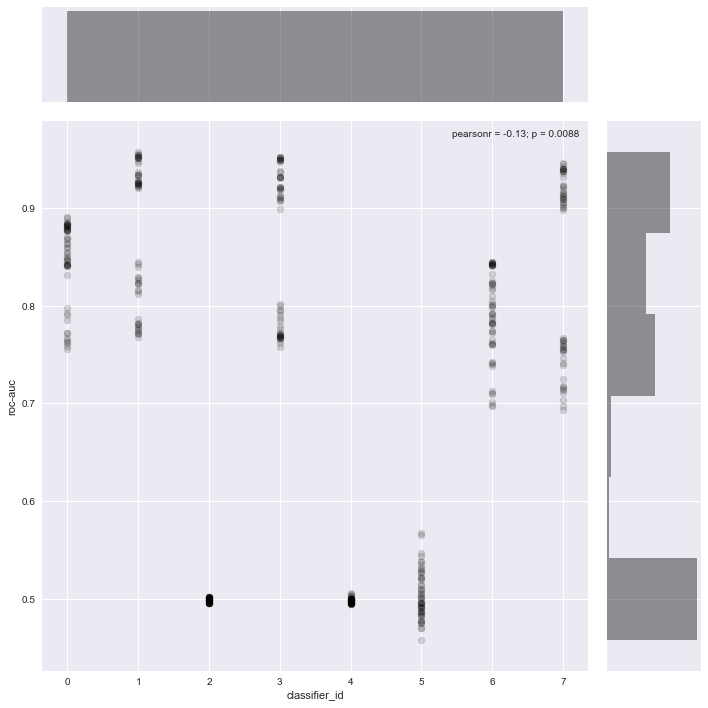

In [19]:
new_pred = predictions[predictions.split == 'avg']

#exp_1_1 = new_pred[new_pred.training_numprocs == 1]
#exp_1_1 = new_pred[new_pred.testing_numprocs == 1]

sns.jointplot(x="classifier_id", y="roc-auc", data=new_pred, 
              size=10, alpha=.15, color='k')
sns.plt.show()

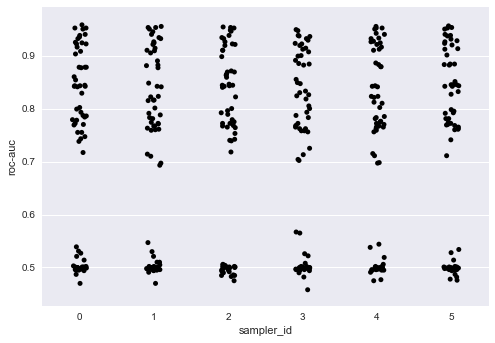

In [41]:
new_pred = predictions[predictions.split == 'avg']

#exp_1_1 = new_pred[new_pred.training_numprocs == 1]
#exp_1_1 = new_pred[new_pred.testing_numprocs == 1]

sns.stripplot(x="sampler_id", y="roc-auc", data=new_pred, jitter=True, color='k')
sns.plt.show()

In [42]:
np.set_printoptions(threshold=np.nan)
pd.options.display.max_rows = 4000
slim = new_pred.drop(['split','time'], axis=1)
slim = slim.groupby([
                    'training_numprocs','testing_numprocs']).mean()
print(slim)

                                     roc-auc  classifier_id  sampler_id
training_numprocs testing_numprocs                                     
1                 1                 0.739104            3.5         2.5
                  12                0.687042            3.5         2.5
                  24                0.682375            3.5         2.5
12                1                 0.663104            3.5         2.5
                  12                0.756542            3.5         2.5
                  24                0.741479            3.5         2.5
24                1                 0.662188            3.5         2.5
                  12                0.745062            3.5         2.5
                  24                0.756333            3.5         2.5


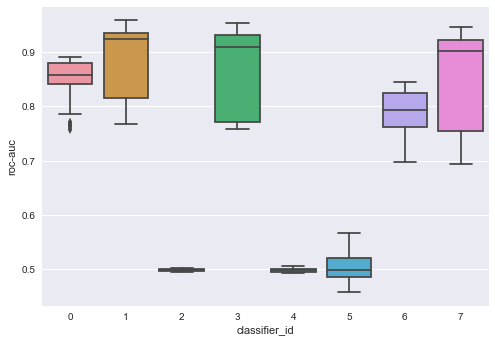

In [46]:
sns.boxplot(x='classifier_id', y='roc-auc', data=new_pred)
sns.plt.show()

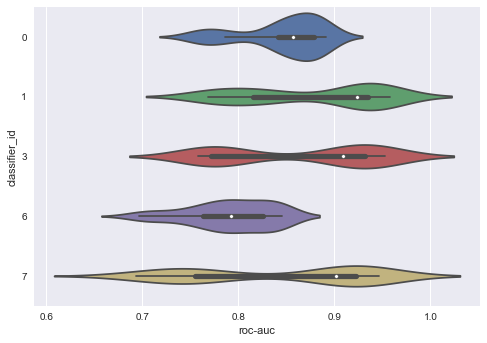

In [55]:
good_classifiers = new_pred[(new_pred['classifier_id'] > 5) | 
                            (new_pred['classifier_id'] < 2) | 
                            (new_pred['classifier_id'] == 3)]
sns.violinplot(y='classifier_id', x='roc-auc', data=good_classifiers, orient='h')
sns.plt.show()

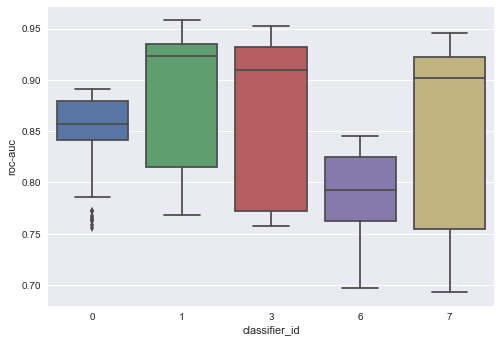

In [56]:
sns.boxplot(x='classifier_id', y='roc-auc', data=good_classifiers)
sns.plt.show()

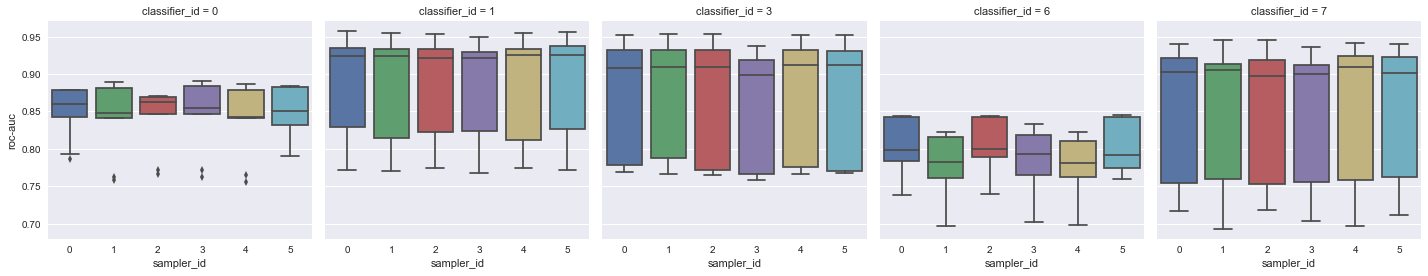

In [60]:
sns.factorplot(x="sampler_id", y="roc-auc", col="classifier_id", data=good_classifiers, kind="box")
sns.plt.show()

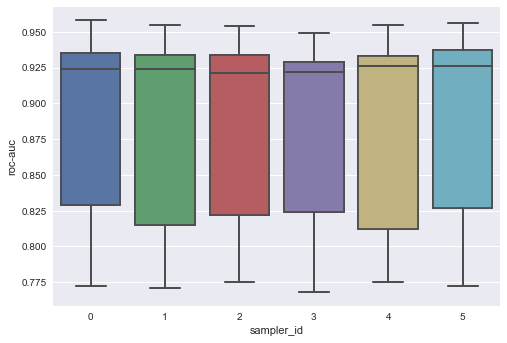

In [67]:
classifier_1 = new_pred[(new_pred['classifier_id'] == 1)]
sns.boxplot(x="sampler_id", y="roc-auc", data=classifier_1)
sns.plt.show()